In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
color_pal = sns.color_palette('tab10')

In [36]:
months_order = ['Jan', "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [2]:
with open("E:\Downloads\SOCIAL Drive - Downloads\WhatsApp Chat with Anubhav Singh.txt", 'r', encoding='utf-8') as file:
    content = file.read()
content_list = content.split("\n")
len(content_list)

13953

In [3]:
content_list[322]

'Password 111'

In [4]:
new_content_list = []
for i, x in enumerate(content_list):
    if "-" in x:
        new_content_list.append(x)
len(new_content_list)

13811

In [5]:
data = content_list
df = pd.DataFrame(new_content_list, columns=['all'])

In [6]:
df['date'] = df['all'].str.split(" - ").str[0].str.split(", ").str[0]
df['time'] = df['all'].str.split(" - ").str[0].str.split(", ").str[1]

In [7]:
indices_starting_without_A = df[df['all'].str.split(" - ").str[1].str[0] != "A"].index
df = df.drop(index=indices_starting_without_A, axis=0).reset_index(drop=True)

In [8]:
date_indices_to_drop = df[df['date'].str.count("/") == 0].index
df = df.drop(index=date_indices_to_drop, axis=0).reset_index(drop=True)

In [9]:
len(df)

13756

In [10]:
df['name'] = df['all'].str.split(" - ").str[1].str.split(": ").str[0]
df['text'] = df['all'].str.split(" - ").str[1].str.split(": ").str[1]

In [11]:
df.drop(columns='all', inplace=True)

In [12]:
df.head()

,date,time,name,text
0,4/19/19,22:36,Anubhav Singh,Be mai Anubhav
1,4/19/19,22:36,Anubhav Singh,12 baje aana online pubg
2,4/19/19,22:36,Anubhav Singh,Aur vo id bhej
3,4/19/19,22:36,Asad Ahsan,Okay
4,4/19/19,22:37,Asad Ahsan,Us time shayad squad rahegi be meri


In [13]:
df['datetime'] = pd.to_datetime(df['date'])
df.drop(columns='date', inplace=True)
df.head()

C:\Users\CWC\AppData\Local\Temp\ipykernel_12280\3862907819.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['date'])


,time,name,text,datetime
0,22:36,Anubhav Singh,Be mai Anubhav,2019-04-19
1,22:36,Anubhav Singh,12 baje aana online pubg,2019-04-19
2,22:36,Anubhav Singh,Aur vo id bhej,2019-04-19
3,22:36,Asad Ahsan,Okay,2019-04-19
4,22:37,Asad Ahsan,Us time shayad squad rahegi be meri,2019-04-19


In [14]:
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['month_name'] = df['datetime'].dt.month_name().str[:3]
df['year'] = df['datetime'].dt.year

In [15]:
df['hour'] = df['time'].str[:2]

In [16]:
df['name'].value_counts()

name
Anubhav Singh    7462
Asad Ahsan       6294
Name: count, dtype: int64

In [50]:
df = df.sort_values("datetime")

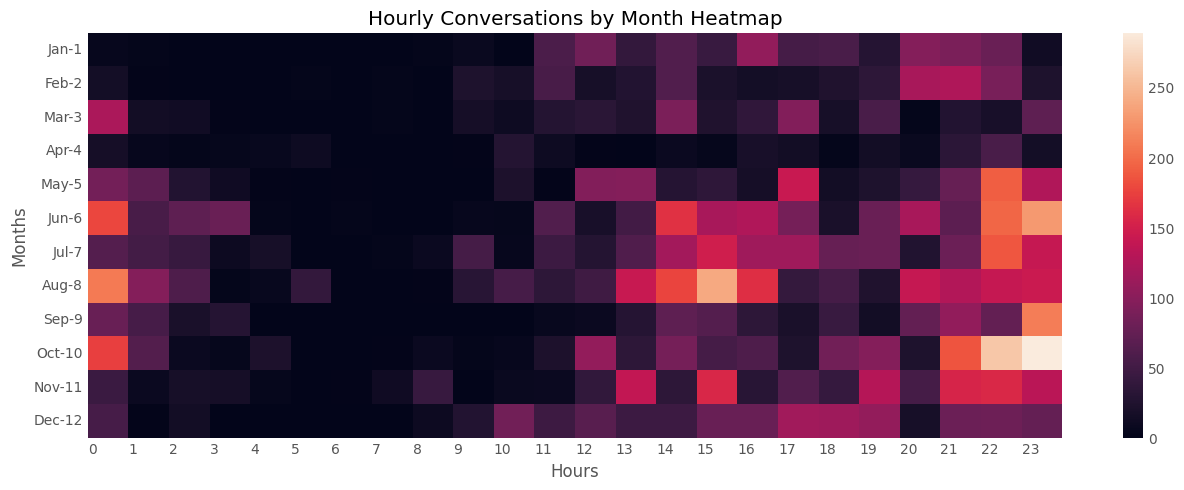

In [98]:
hour_month_relation = df.groupby(['month_name', 'month', 'hour'])['hour'].count().unstack().fillna(0).sort_values('month')
hour_ticks = [x for x in range(24)]
plt.figure(figsize=(14,5))
sns.heatmap(hour_month_relation)
plt.yticks(rotation=0)
plt.xticks(ticks=[x for x in range(24)], labels=hour_ticks, ha='left')
plt.title("Hourly Conversations by Month Heatmap")
plt.xlabel("Hours")
plt.ylabel("Months")
plt.show()

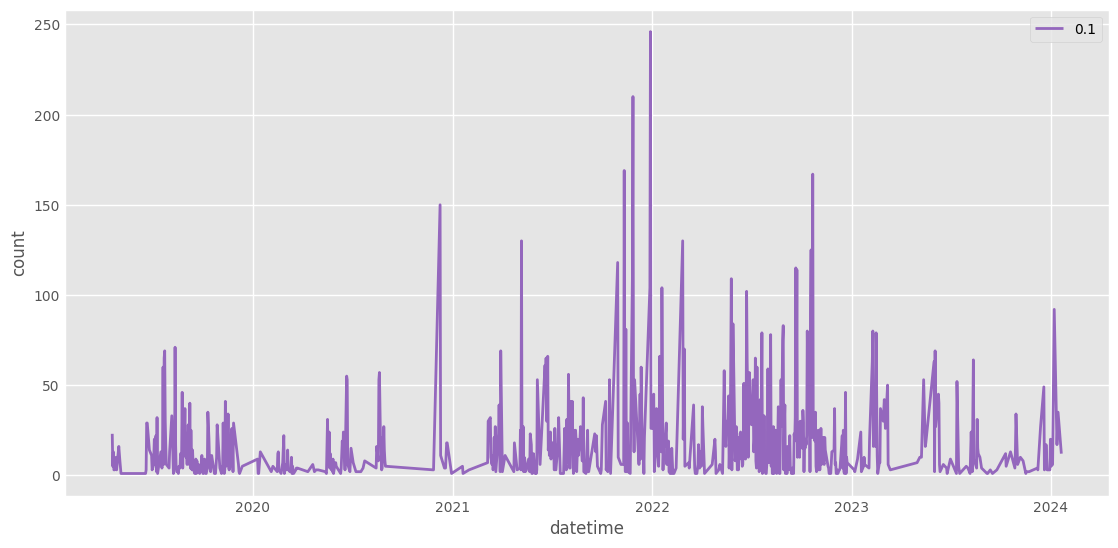

In [91]:
# Draw a linePlot
conversations_by_day = df['datetime'].value_counts().reset_index().sort_values('datetime')
plt.figure(figsize=(12,6))
sns.lineplot(data=conversations_by_day, x='datetime', y='count', size=0.1, color=color_pal[4])
plt.show()

In [97]:
df[df['text'].str.contains("https://youtu.be")]

,time,name,text,datetime,day,month,month_name,year,hour
892,23:40,Anubhav Singh,https://youtu.be/CpsmxHFEIcA,2019-08-28,28,8,Aug,2019,23
914,00:46,Anubhav Singh,https://youtu.be/PFJFILx0IIo,2019-08-30,30,8,Aug,2019,00
2697,17:04,Asad Ahsan,https://youtu.be/5JQFsOuNclM,2020-12-19,19,12,Dec,2020,17
3343,01:58,Asad Ahsan,https://youtu.be/uAL_pu9YLfM,2021-05-20,20,5,May,2021,01
3417,18:59,Asad Ahsan,https://youtu.be/4fmbfj_6VVo,2021-06-05,5,6,Jun,2021,18
3885,14:23,Asad Ahsan,https://youtu.be/h_5_gY-GpXs,2021-07-01,1,7,Jul,2021,14
3888,14:24,Asad Ahsan,https://youtu.be/53soCqia8F0,2021-07-01,1,7,Jul,2021,14
3887,14:24,Asad Ahsan,https://youtu.be/lav-BDxEI9c,2021-07-01,1,7,Jul,2021,14
3886,14:24,Asad Ahsan,https://youtu.be/AvxM5aCEIX8,2021-07-01,1,7,Jul,2021,14
3884,14:23,Asad Ahsan,https://youtu.be/27uWvcOh44I,2021-07-01,1,7,Jul,2021,14


In [95]:
df[(df['month_name']=='Aug')&(df['hour']=="05")]

,time,name,text,datetime,day,month,month_name,year,hour
818,05:26,Asad Ahsan,Kal bolta,2019-08-25,25,8,Aug,2019,05
819,05:26,Anubhav Singh,Lavde tumlog khud hi jhagadte rehte,2019-08-25,25,8,Aug,2019,05
820,05:27,Anubhav Singh,Kya improve krna vo nhi bolte,2019-08-25,25,8,Aug,2019,05
821,05:27,Anubhav Singh,Noob,2019-08-25,25,8,Aug,2019,05
822,05:27,Asad Ahsan,Kyunki nhi ghuana h competitive me,2019-08-25,25,8,Aug,2019,05
823,05:28,Anubhav Singh,Kyu lavde,2019-08-25,25,8,Aug,2019,05
824,05:28,Asad Ahsan,Mazze k liye be,2019-08-25,25,8,Aug,2019,05
825,05:28,Asad Ahsan,Mazze,2019-08-25,25,8,Aug,2019,05
826,05:29,Asad Ahsan,Ohh yeah,2019-08-25,25,8,Aug,2019,05
827,05:29,Asad Ahsan,Acha yaad dilayaa,2019-08-25,25,8,Aug,2019,05
